# Linear regression with prior (using gradient descent)
> What if we start from some prior!

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

Let's say we have a prior on the linear model, i.e. we start with a known W (W_prior) and b (b_prior). Further, we say that the learnt function can be such that:

$$W = \alpha \times W_{prior} + \delta$$
$$b = \beta + b_{prior} + \eta$$

Our task reduces to learn $\alpha$, $\beta$, $\delta$ and $\eta$. This can be solved as we would usually do using Gradient descent, the only difference being that we will compute the gradient wrt $\alpha$ , $\beta$, $\delta$, $\eta$. I will use autograd to compute the gradients.

In a typical model we might have 2 parameters (w and b). In our `refined` one, we have four- $\alpha$ , $\beta$, $\delta$, $\eta$.

### Customary imports

In [2]:
import autograd.numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### True model  

$$Y = 10 X + 6$$

### Generating data

In [3]:
np.random.seed(0)
n_samples = 50
X = np.linspace(1, 50, n_samples)
Y = 10*X + 6 + 3*np.random.randn(n_samples)

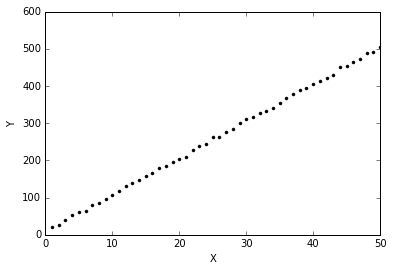

In [4]:
plt.plot(X, Y, 'k.')
plt.xlabel("X")
plt.ylabel("Y");

### Defining priors (bad ones!)

In [5]:
w_prior = -2
b_prior = -2

### Defining the cost function in terms of alpha and beta

In [6]:
def cost(alpha, beta, delta, eta):
    pred = np.dot(X, alpha*w_prior+delta) + b_prior + beta + eta
    return np.sqrt(((pred - Y) ** 2).mean(axis=None))

from autograd import grad, multigrad
grad_cost= multigrad(cost, argnums=[0, 1, 2, 3])

### Gradient descent

In [7]:
alpha = np.random.randn()
beta = np.random.randn()
eta = np.random.randn()
delta = np.random.randn()
lr = 0.001
# We will also save the values for plotting later
w_s = [alpha*w_prior+delta]
b_s = [alpha*w_prior+delta]
for i in range(10001):
    
    del_alpha, del_beta, del_delta, del_eta = grad_cost(alpha, beta, delta, eta)
    alpha = alpha - del_alpha*lr
    beta = beta - del_beta*lr
    delta = delta - del_delta*lr
    eta = eta - del_eta*lr
    w_s.append(alpha*w_prior+delta)
    b_s.append(alpha*w_prior+delta)
    if i%500==0:
        print "*"*20
        print i
        print "*"*20
    
        print cost(alpha, beta, delta, eta), alpha*w_prior+delta, alpha*w_prior+delta

********************
0
********************
277.717926153 0.756766902473 0.756766902473
********************
500
********************
5.95005440573 10.218493676 10.218493676
********************
1000
********************
5.77702829051 10.2061390906 10.2061390906
********************
1500
********************
5.60823669668 10.1939366275 10.1939366275
********************
2000
********************
5.44395500928 10.1818982949 10.1818982949
********************
2500
********************
5.28446602486 10.1700368748 10.1700368748
********************
3000
********************
5.1300568557 10.158365894 10.158365894
********************
3500
********************
4.98101499128 10.1468995681 10.1468995681
********************
4000
********************
4.83762347034 10.1356527141 10.1356527141
********************
4500
********************
4.70015516667 10.1246406278 10.1246406278
********************
5000
********************
4.56886626032 10.1138789219 10.1138789219
********************
5500
**

We are able to learn a reasonably accurate W=10.07 and b=2.7. 

### Bonus: Animation

Making the plots look nicer.

In [40]:
def format_axes(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('grey')
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color='grey')
    return ax

In [44]:
# Code courtesy: http://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(4, 3))
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.

ax.scatter(X, Y, color='grey', alpha=0.8, s=1)
# Initial line

line, = ax.plot(X, X*w_prior+b_prior, 'r-', linewidth=1)

def update(i):
    label = 'Iteration {0}'.format(i)
    line.set_ydata(X*w_s[i]+b_s[i])
    ax.set_xlabel(label)
    format_axes(ax)
    return line, ax

anim = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=1)
anim.save('line_prior.gif', dpi=80, writer='imagemagick')
plt.close()

fig size: 72.0 DPI, size in inches [ 4.  3.]


![](https://nipunbatra.github.io/blog/images/line_prior.gif)